# OpenCV with Python Tutorial

In [1]:
#Standard Imports
import cv2
print("Opencv version is:", cv2.__version__)
import os, sys, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Opencv version is: 3.4.4


In [2]:
# Set Image Path
input_dir = "images"
filename = "dl.jpg"
image_path = os.path.join(input_dir,filename)

# Read, Display and Saving the image
By default opencv used BGR format. Why it does so, read it here:
https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/ (P.S. It is funny)

Text(0.5,1,'Original RGB Image')

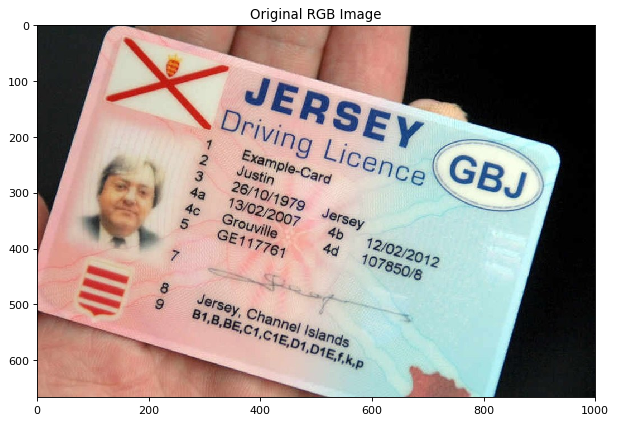

In [3]:
# Read image in BGR format
image_cv = cv2.imread(image_path)
# Read image in Grayscale
image_gray = cv2.imread(image_path,0)
# Display the image in RGB format using pyplot
fig = plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
fig = plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image')
# Save the image
#cv2.imwrite("output.jpg",image)

# Channel and Pixel manipulation

In [5]:
# Getting image shape information
height,width,channels = image_cv.shape 
b,g,r = cv2.split(image_cv)

# For HSV image
hsv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
hsv_split = np.concatenate((h,s,v),axis=1)  # hsv_split is a 1-channel image

# Total number of pixels
print("Total number of pixels in the image:", image_cv.size)

# Accessing pixel value at coordinate x and y
x = 100; y = 100
px = image_cv[100,100]
print("Pixel value at {} {} is: {}".format(x,y,px))

#

Total number of pixels in the image: 2001000
Pixel value at 100 100 is: [182 179 218]


# Color Conversion
For color conversion, we use the function cv2.cvtColor(input_image, flag), where flag determines the type of conversion. 

A list of different types of FLAG include:

In [6]:
image_RGB = cv2.cvtColor(image_cv,cv2.COLOR_BGR2RGB)

# Image Processing

## Thresholding

Text(0.5,1,'Original BW')

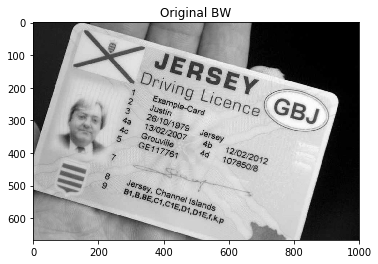

In [8]:
# For thresholding we need a grayscale image 
bw = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
plt.imshow(bw, cmap='gray')
plt.title('Original BW')

### Global Thresholding
     cv2.threshold(image_gray,threshold,maxVal,flags)
flags determine the type of algorithm to use. Avlb flags are:
 - cv2.THRESH_BINARY
 - cv2.THRESH_BINARY_INV
 - cv2.THRESH_TRUNC
 - cv2.THRESH_TOZERO
 - cv2.THRESH_TOZERO_INV <br>

See the Enumerate table to show mathematical representations

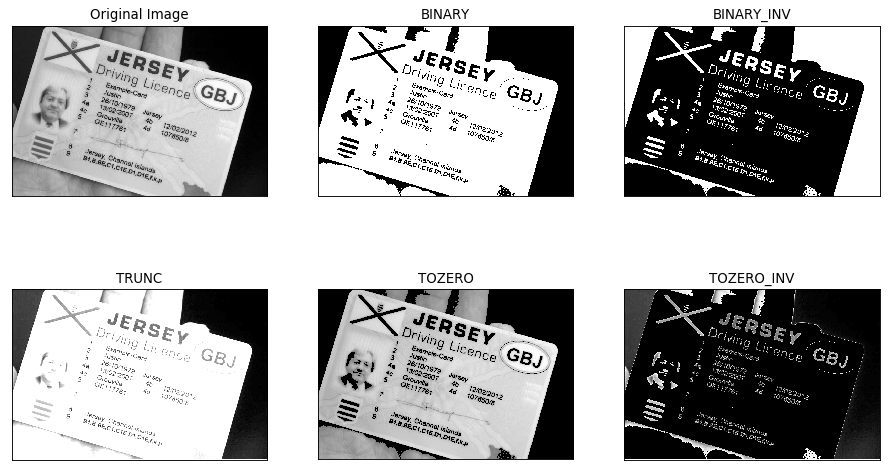

In [18]:
thresh = 120
ret, thresh1 = cv2.threshold(bw,thresh,255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(bw,thresh,255,cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(bw,thresh,255,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(bw,thresh,255,cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(bw,thresh,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [bw, thresh1, thresh2, thresh3, thresh4, thresh5]

f = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Otsu Thresholding
This method is mainly applicable for bimodal images. When we use Otsu, it automatically calculates a threshold value from image histogram for a bimodal image

Text(0.5,1,'Otsu thresholded image')

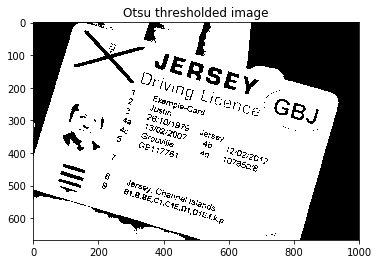

In [10]:
ret2,otsu = cv2.threshold(bw,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(otsu, cmap='gray')
plt.title('Otsu thresholded image')

### Adaptive Thresholding
        cv2.adaptiveThreshold(image,maxVal, Adaptive Method, Thresholding algorithm, block size, C)
        
If image has different lighting conditions in different areas we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image.So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.
The method has 3 additional arguments
1. Adaptive Method - It decides how thresholding value is calculated. <br>
cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area. <br>
cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
2. Block Size - It decides the size of neighbourhood area.
3. C - It is just a constant which is subtracted from the mean or weighted mean calculated.

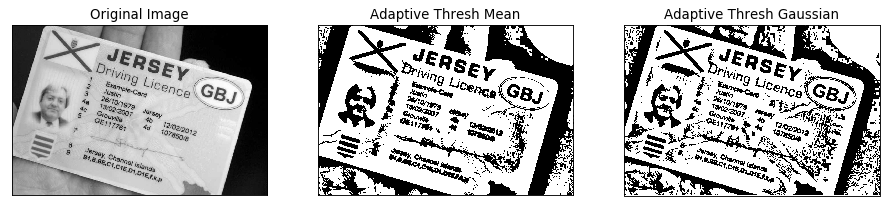

In [16]:
adaptive_mean = cv2.adaptiveThreshold(bw,255,cv2.ADAPTIVE_THRESH_MEAN_C,
            cv2.THRESH_BINARY,115,1)
adaptive_gaussian = cv2.adaptiveThreshold(bw,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,115,1)

titles = ['Original Image','Adaptive Thresh Mean','Adaptive Thresh Gaussian']
images = [bw, adaptive_mean, adaptive_gaussian]

f = plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Blended Thresholding

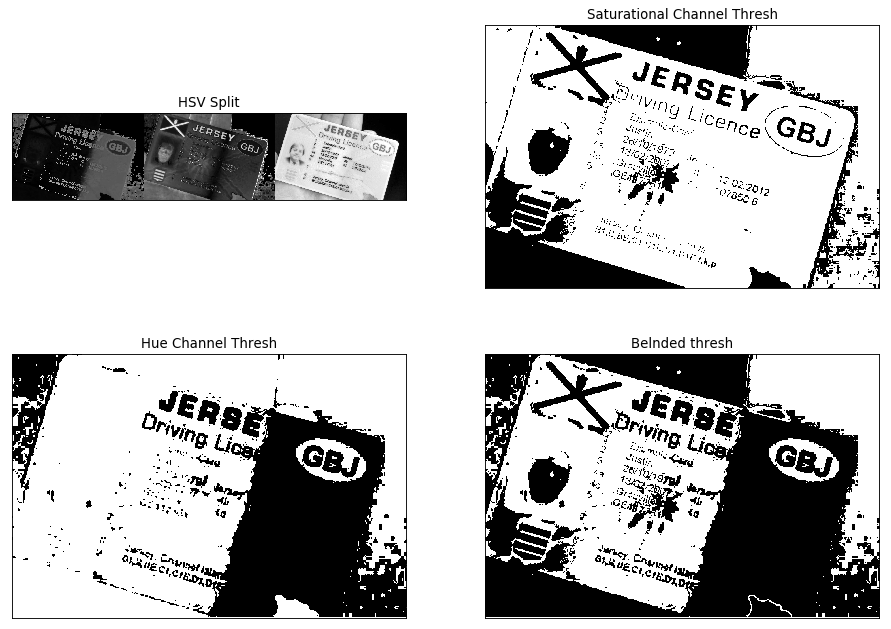

In [20]:
img = image_cv.copy()
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

hsv_split = np.concatenate((h,s,v), axis=1)

# Otsu thresholding on hue channel
ret, hue = cv2.threshold(h,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Otsu thresholding on sat channel
ret, sat = cv2.threshold(s,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

blended = cv2.bitwise_and(sat,hue)

titles = ['HSV Split','Saturational Channel Thresh','Hue Channel Thresh', 'Belnded thresh']
images = [hsv_split, sat, hue, blended ]

f = plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

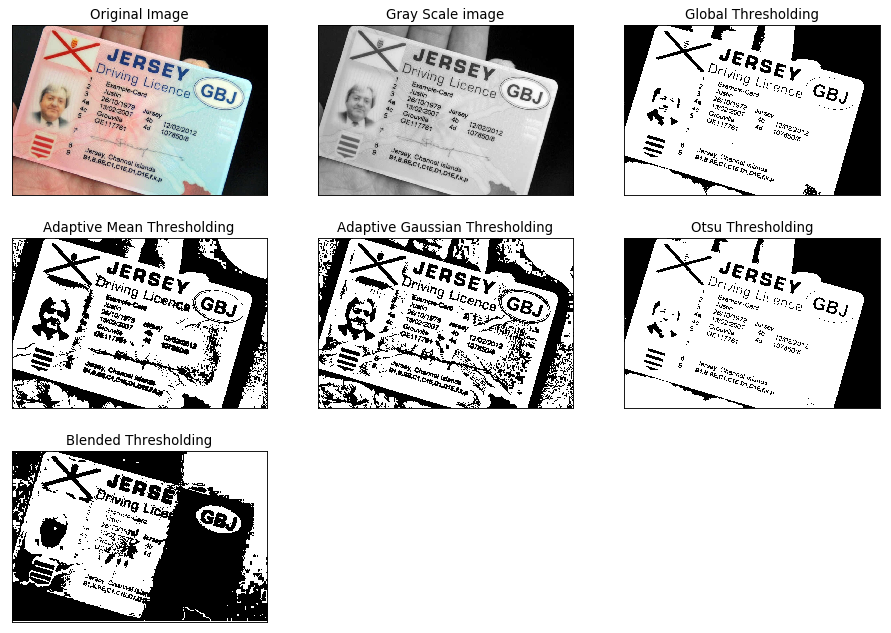

In [24]:
# Comparing different thresholding methods
titles = ['Original Image', "Gray Scale image", 'Global Thresholding',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding', 
            'Otsu Thresholding', 'Blended Thresholding']
images = [cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB), bw, thresh1, adaptive_mean, adaptive_gaussian, otsu, blended]

f = plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')
for i in range(7):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Segmentation and Cropping

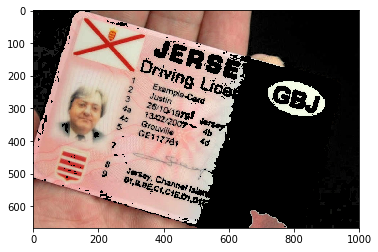

In [26]:
#Preparing segmented image
mask = cv2.merge((hue,hue,hue))
new= cv2.bitwise_and(image_cv, mask)
plt.imshow(cv2.cvtColor(new, cv2.COLOR_BGR2RGB))

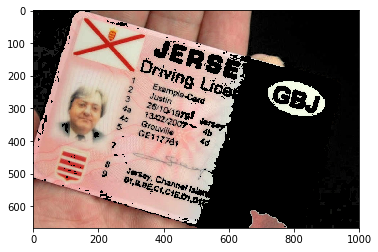

In [27]:
# Autocropping the image
tol =0
mask = new[:,:,0]>tol
ch1 = new[:,:,0][np.ix_(mask.any(1),mask.any(0))]
ch2 = new[:,:,1][np.ix_(mask.any(1),mask.any(0))]
ch3 = new[:,:,2][np.ix_(mask.any(1),mask.any(0))]
final = cv2.merge((ch1,ch2,ch3))
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))

## Dilation and Erosion
Consider black pixels to be background and white pixels to be foregroud. Dilation adds pixel to foreground. Erosion removes pixels from foreground

Text(0.5,1,'Eroded Image')

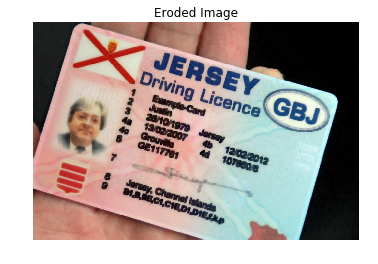

In [30]:
# Define a kernel 
# (not sure) Kernel has to have odd value in both dimension
kernel = np.ones((5,5),'uint8')  
# iternations decide how many no of times the kernel has to pass over the image
dilate = cv2.dilate(image_cv,kernel,iterations=10) 
erode = cv2.erode(image_cv,kernel,iterations=1)

plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))
plt.title('Dilated Image')

plt.axis("off")
plt.imshow(cv2.cvtColor(erode, cv2.COLOR_BGR2RGB))
plt.title('Eroded Image')

## Blur    

### Gaussian Blur. 
The structuring element for Gaussian blur should always have odd values.

Text(0.5,1,'Gaussian Blurred Image')

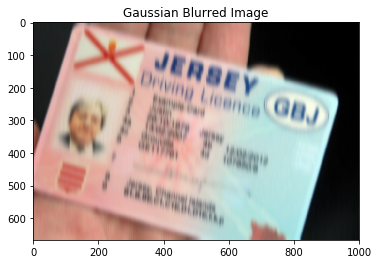

In [31]:
str_ele = (5,55)
gauss_blur = cv2.GaussianBlur(image_cv, (5,55),0)
plt.imshow(cv2.cvtColor(gauss_blur, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blurred Image')

### Median blur

Text(0.5,1,'Median Blurred Image')

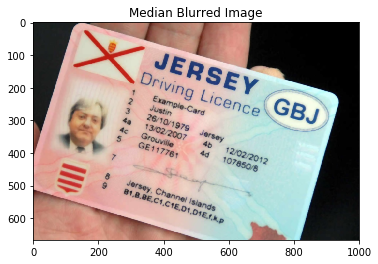

In [32]:
median_blur = cv2.medianBlur(image_cv,5)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title('Median Blurred Image')

## Scale

In [33]:
#This will maintain aspect ratio
img_half = cv2.resize(image_cv, (0,0), fx=0.5, fy=0.5) 
#Here we define a fixed size
img_stretch = cv2.resize(image_cv, (600,600)) 
#
img_stretch_near = cv2.resize(image_cv, (600,600), interpolation=cv2.INTER_NEAREST)  